# IMPORT THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# READ THE DATASET

In [2]:
df=pd.read_csv('US_honey_dataset (1).csv')
df.head(2)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995


In [3]:
df=df.drop(columns=['Unnamed: 0'])  #HERE WE NOTICED THAT THERE IS UNAMED COLUMN SO WE DROP IT

In [4]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [5]:
df.tail()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021
1114,Wyoming,38000,58,242000,242000,2.07,4562000,2021


# EDA-EXPLAROTARY DATA ANALYSIS

In [6]:
df.shape   #HOW MANY COLUMNS AND ROWS IN DATASET

(1115, 8)

In [7]:
df.describe()  # GIVES ALL STATISTICAL VALUES

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000
max,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


In [8]:
df.info() #GIVES COMPLETE INFORMATION ABOUT DATA TYPES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.8+ KB


In [9]:
df['colonies_number'].value_counts() #TO GET A SERIES CONTAINING COUNTS OF UNIQUE VALUES

7000      69
6000      50
8000      49
9000      41
5000      36
          ..
410000     1
128000     1
510000     1
180000     1
137000     1
Name: colonies_number, Length: 189, dtype: int64

In [10]:
df['state'].unique() # GIVES TOTAL NAME

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'NewJersey', 'NewMexico', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'SouthCarolina', 'SouthDakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'WestVirginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [11]:
df['state'].nunique() # GIVES TOTAL NUMBER

44

In [12]:
df.isnull().sum() #CHECK NULL VALUES

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

# LET'S DO SOME QUESTIONS

1. Find out the top producing honey states

In [13]:
df2=df.sort_values("production",ascending=False) #1.
df2

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
3,California,420000,93,39060000,4687000,60.00,23436000,1995
134,California,450000,83,37350000,12326000,62.00,23157000,1998
581,NorthDakota,390000,90,35100000,8424000,135.00,47385000,2008
622,NorthDakota,450000,77,34650000,7623000,137.00,47471000,2009
458,NorthDakota,370000,91,33670000,8418000,81.00,27273000,2005
...,...,...,...,...,...,...,...,...
769,Kentucky,3000,41,17000,17000,325.00,400000,2013
984,SouthCarolina,16000,48,15000,15000,3.17,2435000,2018
955,Alabama,6000,45,14000,14000,3.72,1004000,2018
835,Alabama,7000,47,13000,13000,383.00,1260000,2015


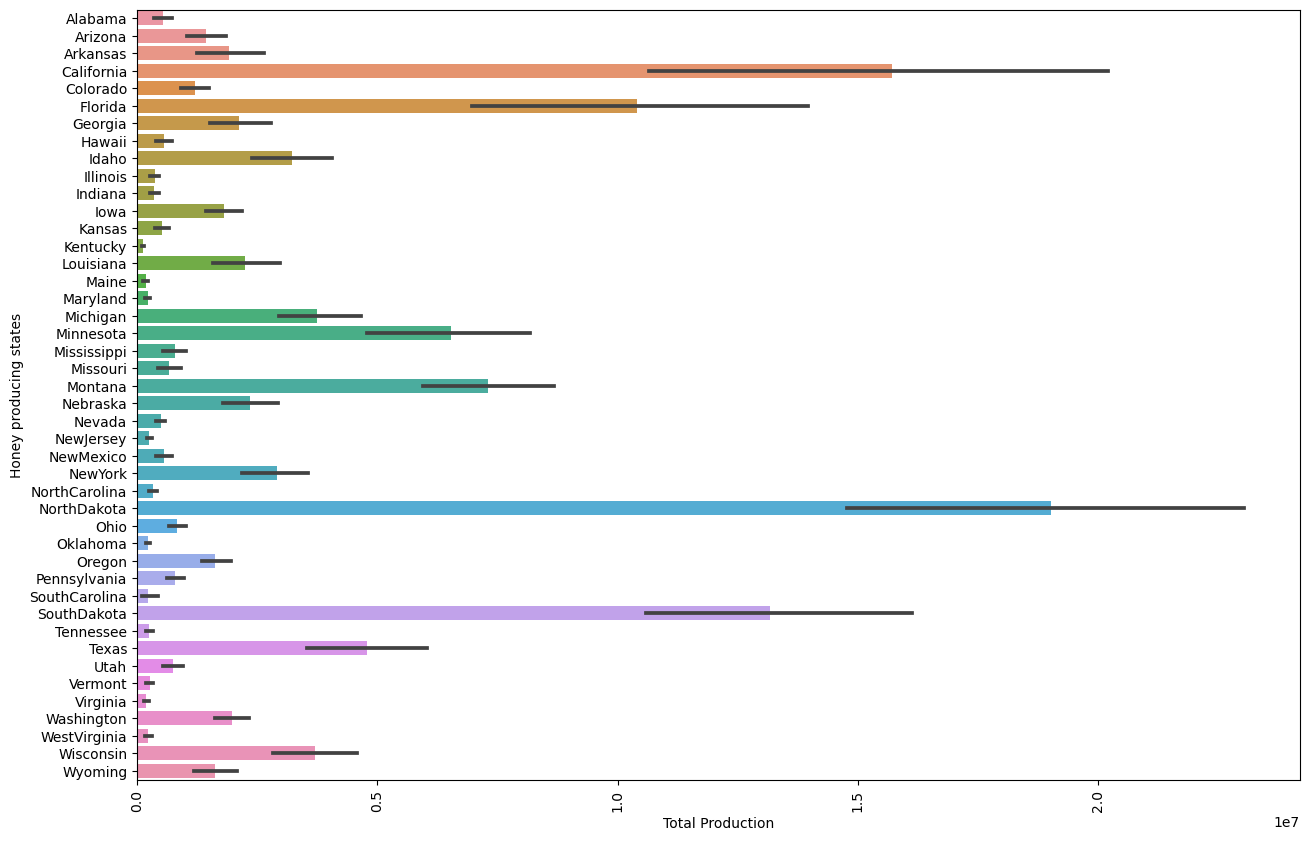

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(y=df['state'],x=df['production'])
plt.xlabel("Total Production")
plt.xticks(rotation=90)
plt.ylabel('Honey producing states')
plt.show()

WE CAN DO IT BY GROUPBY FUNCTION TOO
LET'S SEE IT(BY THIS CODE WE CAN INFER THE TOP 5 HONEY PRODUCING STATES)

In [15]:
state_total=df.groupby('state')['production'].sum()
sorted_states=state_total.sort_values(ascending=False)
sorted_states

state
NorthDakota      513742000
California       423876000
SouthDakota      355726000
Florida          280934000
Montana          197173000
Minnesota        176581000
Texas            129441000
Michigan         101063000
Wisconsin         99909000
Idaho             87188000
NewYork           78444000
Nebraska          63655000
Louisiana         60568000
Georgia           57426000
Washington        53238000
Arkansas          51846000
Iowa              48607000
Wyoming           43921000
Oregon            43789000
Arizona           38844000
Colorado          32660000
Ohio              22485000
Pennsylvania      21370000
Mississippi       21235000
Utah              20369000
Missouri          17904000
Hawaii            15420000
Alabama           14467000
Kansas            14138000
NewMexico         10082000
Illinois           9864000
Indiana            9686000
NorthCarolina      8909000
Nevada             7399000
Vermont            7032000
NewJersey          6913000
Tennessee          685

2. Visualize the change in mean average price of honey from 1995-2021


In [16]:
df1=df.groupby('year').mean()
df1.head()

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
year,,,,,,
1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06


In [17]:
df1=df1.reset_index()
df1.head(10)

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
0,1995,59977.272727,66.909091,4.778909e+06,9.575000e+05,74.840909,3.121000e+06
1,1996,58181.818182,70.068182,4.499886e+06,1.066455e+06,99.568182,4.085773e+06
2,1997,59651.162791,68.953488,4.445953e+06,1.601256e+06,91.325581,3.386000e+06
3,1998,60883.720930,69.953488,5.100488e+06,1.871488e+06,83.720930,3.395302e+06
4,1999,62186.046512,65.465116,4.757791e+06,1.839698e+06,80.325581,2.888070e+06
5,2000,60860.465116,67.534884,5.123721e+06,1.997395e+06,79.023256,3.047023e+06
6,2001,58139.534884,65.209302,4.311698e+06,1.501791e+06,88.465116,2.936302e+06
7,2002,57181.818182,67.272727,3.880273e+06,8.831591e+05,133.204545,5.016977e+06
8,2003,58681.818182,62.522727,4.107750e+06,9.220227e+05,151.068182,5.791659e+06
9,2004,63325.000000,65.025000,4.559475e+06,1.523100e+06,132.350000,4.976100e+06


<function matplotlib.pyplot.show(close=None, block=None)>

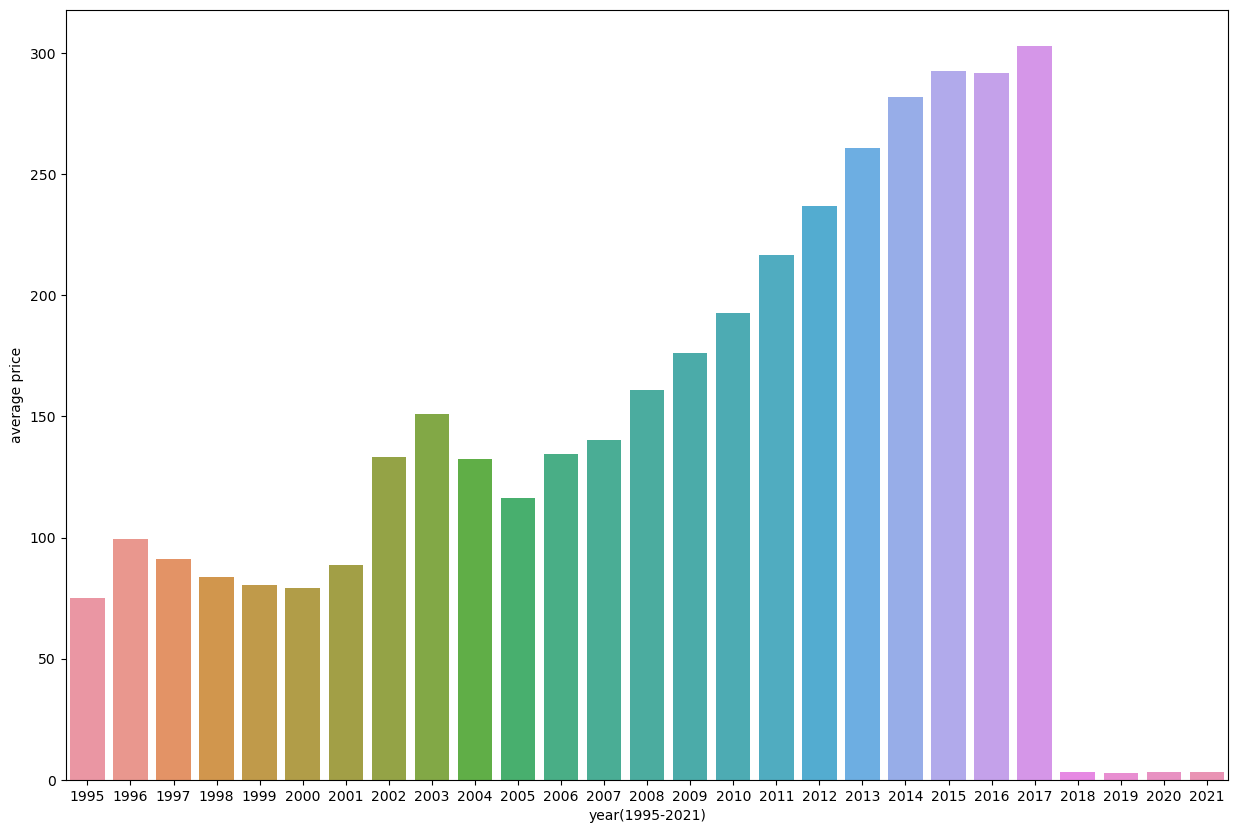

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1['year'],y=df1['average_price'])
plt.xlabel('year(1995-2021)')
plt.ylabel('average price')
plt.show

#WE CAN INFER  FROM THE ABOVE GRAPH 2017 HAS MAXIMUM AVERAGE PRICE OF HONEY

3. Calculate the year when the production of honey was highest

In [19]:
df1[df1['production']==df1['production'].max()]

,year,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production
5,2000,60860.465116,67.534884,5.123721e+06,1.997395e+06,79.023256,3.047023e+06


In [20]:
df1['year'][df1['production']==df1['production'].max()] #THROUGH THIS WE FETCH THE YEAR IN WHICH PRODUCTION WAS HIGHEST

5    2000
Name: year, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

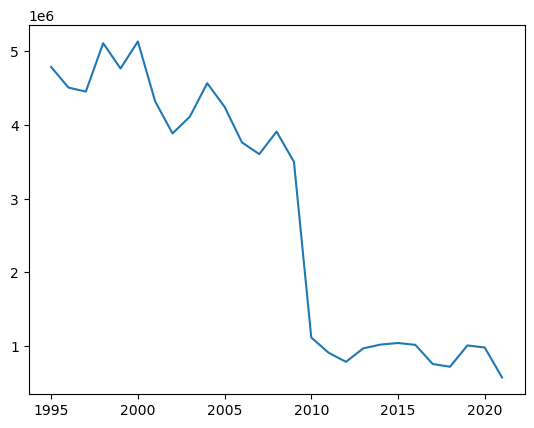

In [21]:
plt.plot(df1['year'],df1['production'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

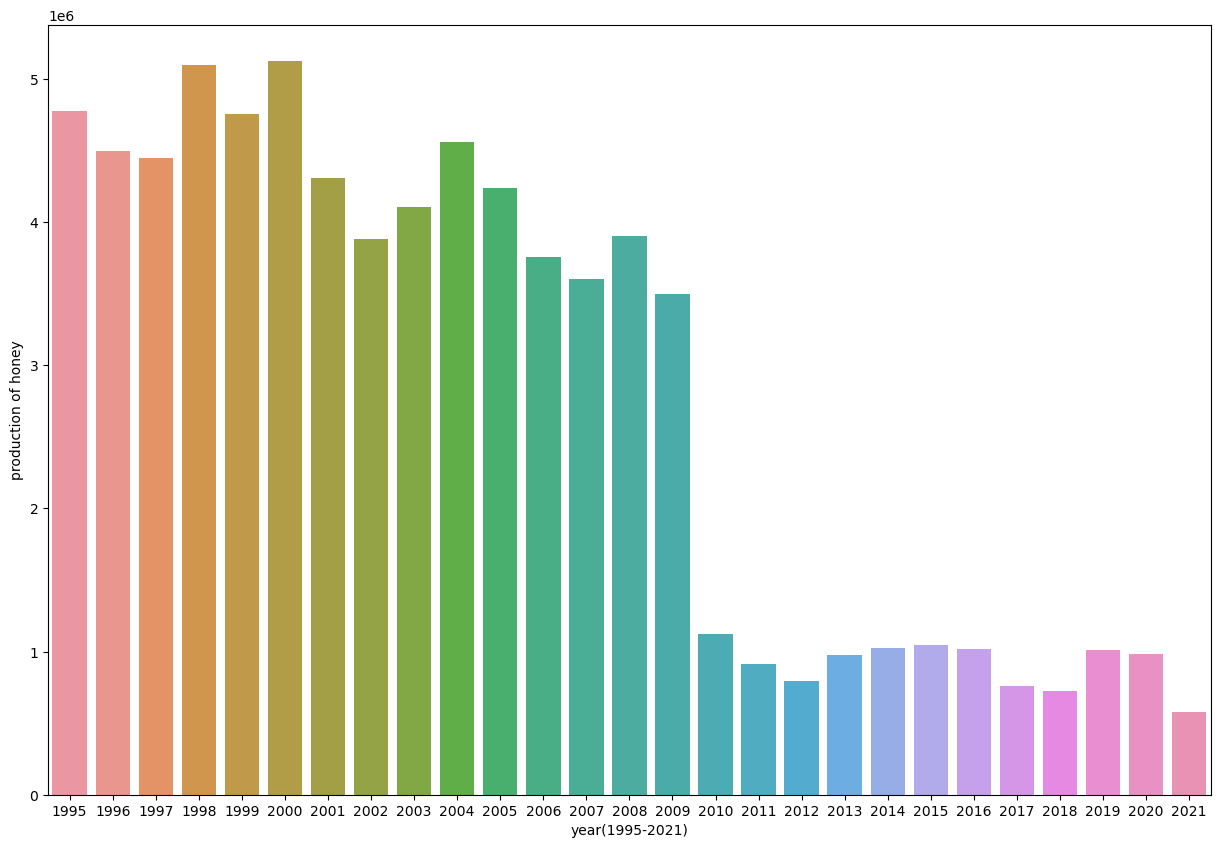

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1['year'],y=df1['production'])
plt.xlabel('year(1995-2021)')
plt.ylabel('production of honey')
plt.show

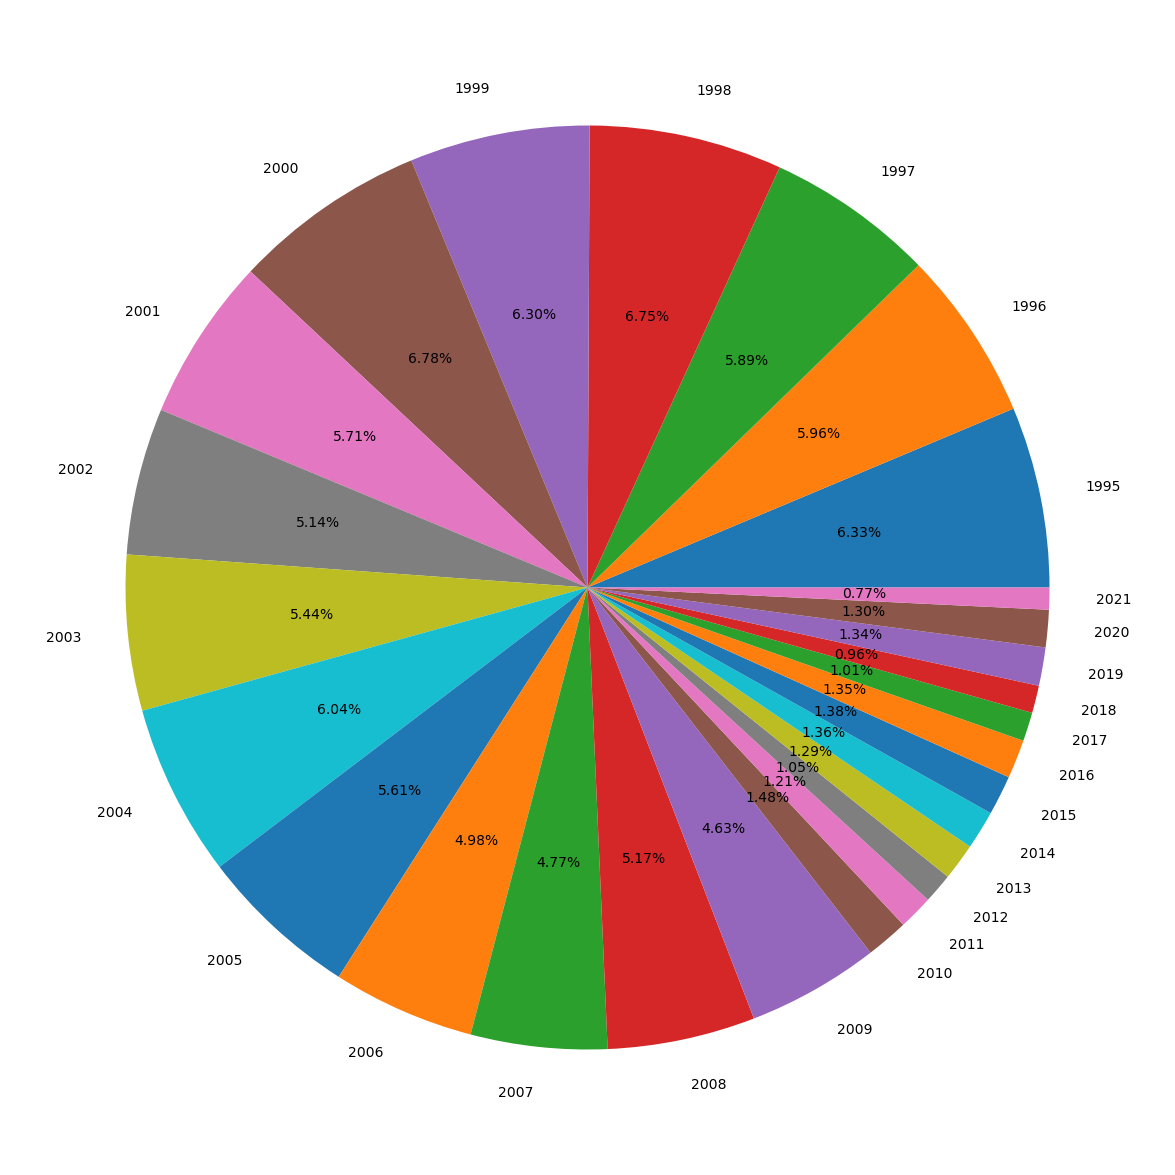

In [23]:
plt.figure(figsize=(20,15))
plt.pie(df1['production'],labels=df1['year'],autopct='%1.2f%%')
plt.show()


# THROUGH PIE CHART ALSO CLEARLY WE SEE THAT IN YEAR 2000 TOTAL PRODUCTION  WAS THE HIGHEST

4. Find out the year in which the price of honey was cheapest

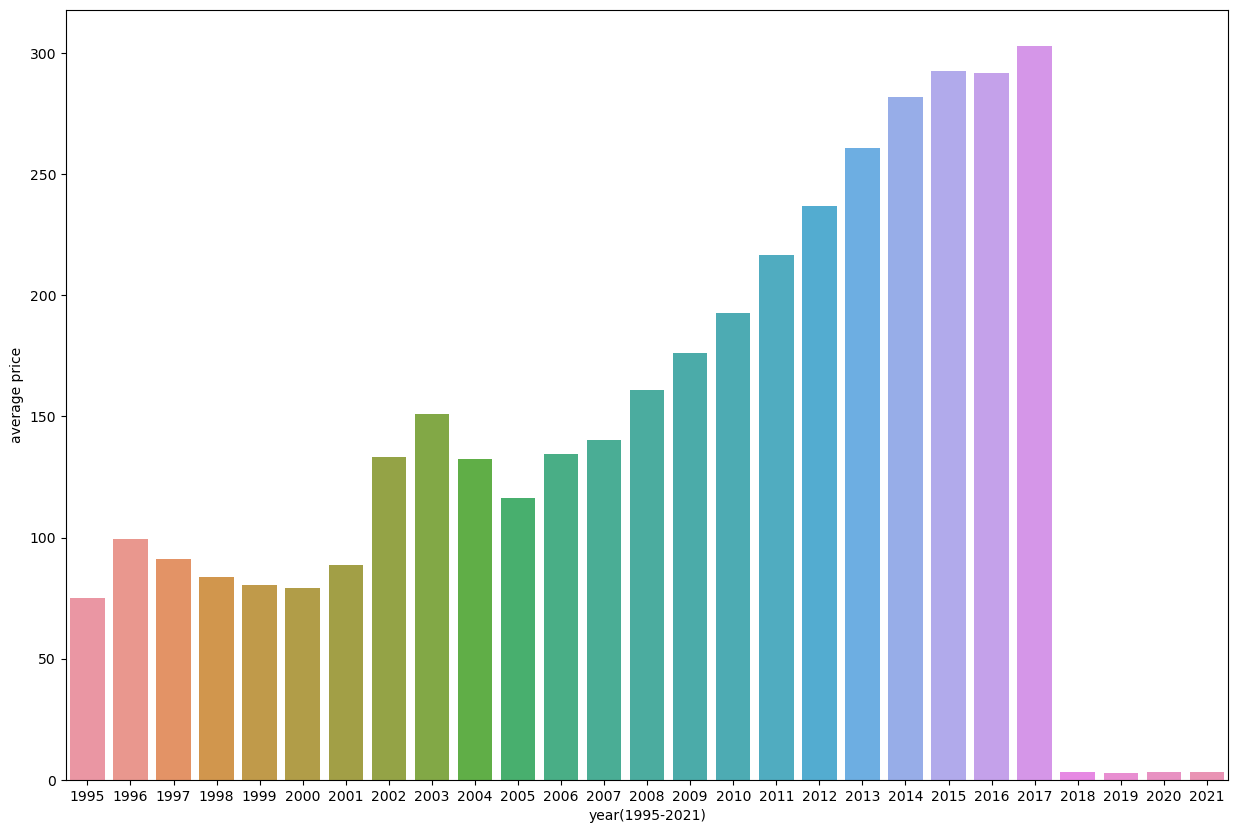

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1['year'],y=df1['average_price'])
plt.xlabel('year(1995-2021)')
plt.ylabel('average price')
plt.show()

 #THROUGH THIS WE FETCH THE YEAR IN WHICH PRICE OF HONEY WAS CHEAPEST AND ITS(2018,2019,2020,2021)

5. Find out which state is having highest number of colonies

In [25]:
df3=df.groupby(['state']).sum()
df3=df3.reset_index()
df3

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,288000,1615,14467000,2987000,4057.61,28668000,54216
1,Arizona,854000,1490,38844000,17758000,2978.77,59772000,54216
2,Arkansas,908000,1886,51846000,20897000,2870.45,73781000,54216
3,California,10135000,1426,423876000,137611000,2954.06,653982000,54216
4,Colorado,799000,1520,32660000,18695000,3200.56,63844000,54216
5,Florida,5528000,1956,280934000,47037000,2967.52,509670000,54216
6,Georgia,1917000,1354,57426000,9932000,3260.68,145945000,54216
7,Hawaii,296000,2802,15420000,3508000,3719.13,49888000,54216
8,Idaho,2705000,1121,87188000,40503000,2869.71,139536000,54216
9,Illinois,236000,1562,9864000,4957000,5842.43,36782000,54216


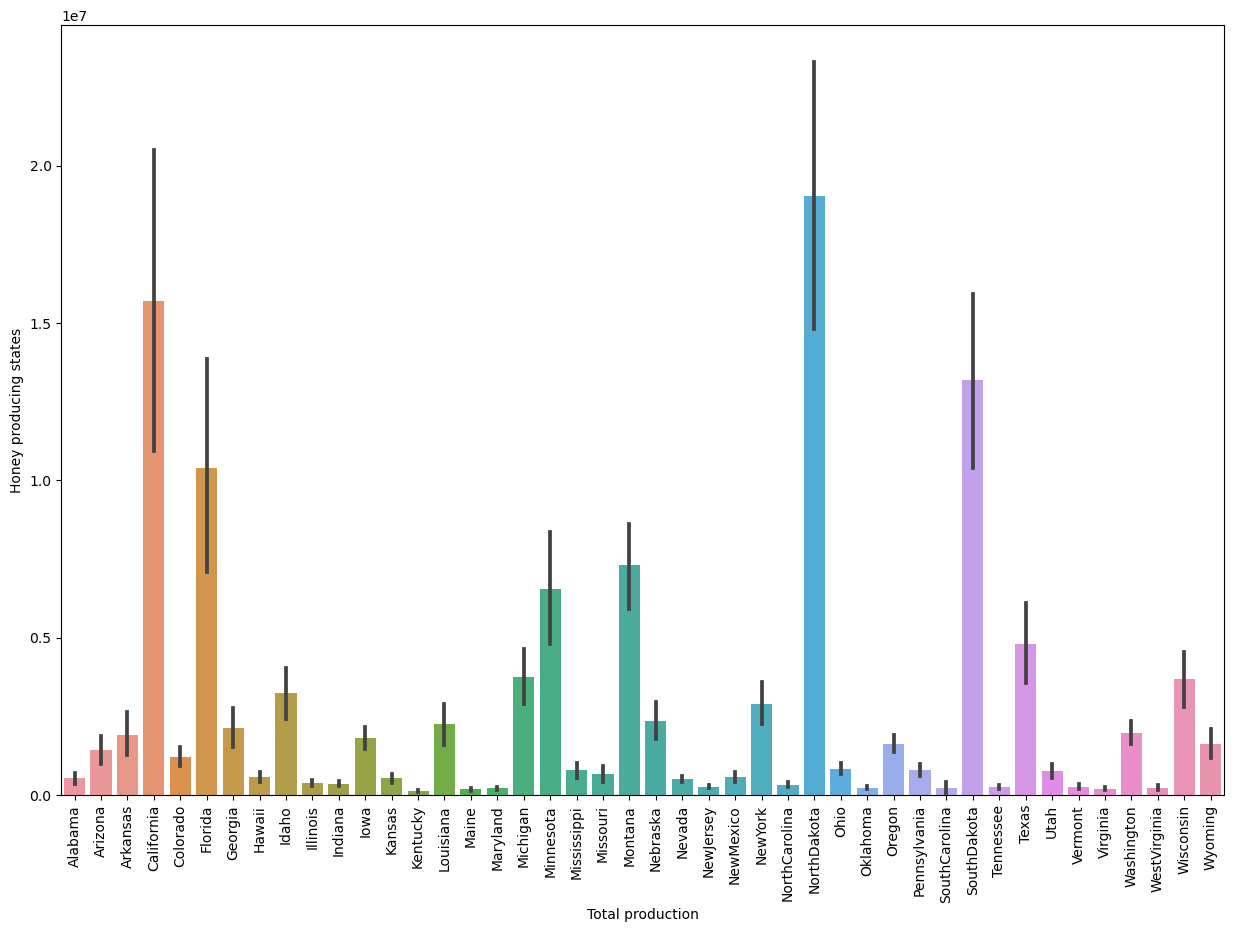

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['state'],y=df['production'])
plt.xlabel("Total production")
plt.xticks(rotation=90)
plt.ylabel("Honey producing states")
plt.show()

#through this bar graph we see the hyighest number of colonies in state

# THANK YOU !!